In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wave as w
import copy
np.set_printoptions(precision=2)
from cycler import cycler
# w.Spectrum.k = np.array([w.GREEN, w.GREEN*1.01])
plt.rcParams['axes.prop_cycle'] = cycler('color', plt.get_cmap('viridis')(np.linspace(0, 1, 21)))

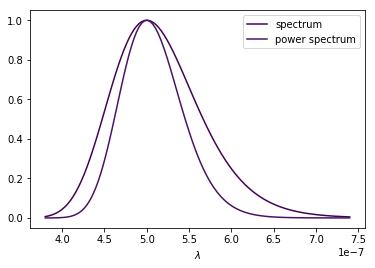

/home/miska/system/anaconda3/envs/lippmann/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


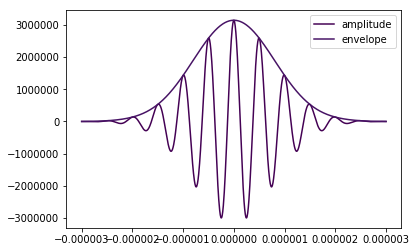

In [2]:
s = w.GaussianSpectrum(mean=w.GREEN, std=(5*w.MICRO))
# s = w.DeltaSpectrum(wavelength=w.GREEN)
z = np.linspace(-3*w.MICRO, 3*w.MICRO, 1000)
s.delay(0)
s.plot(wavelength=True)
plt.show()
s.plot_amplitude(z)
plt.show()

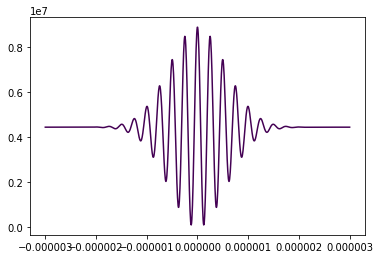

In [3]:
intf = w.Interference(s, s)
# for t in np.linspace(-2*np.pi, 2*np.pi, 11):
#     plt.plot(z, intf.amplitude(z=z, time=t), c="C0", alpha=0.2)
plt.plot(z, intf.intensity(z=z))
plt.show()

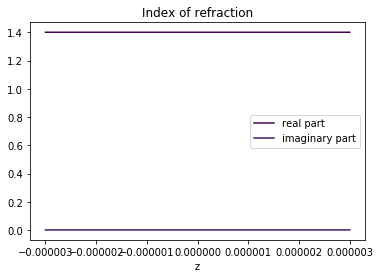

In [4]:
common_n = 1.4 + 0.001j
fixed_dielectric = w.FixedDielectric(z=z, n0=common_n)
fixed_dielectric.plot()
plt.show()

In [5]:
# s.plot()
# s.negative = False
# trans = dielectrc.transmitted(s)
# trans.plot()

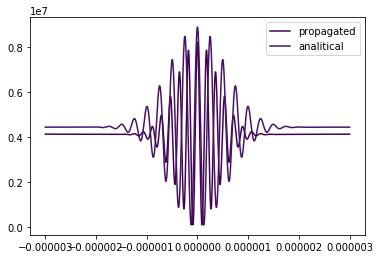

In [6]:
plt.plot(fixed_dielectric.z, fixed_dielectric.energy_distribution(intf), label="propagated")
plt.plot(z, intf.intensity(z=z), label="analitical")
plt.legend()
plt.show()

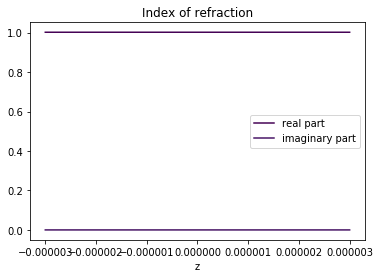

In [7]:
dielectric = w.Dielectric(z=z, n0=1, max_dn=0.2, max_visible_energy=0.5, min_energy=4e6, max_energy=1.2e7)
dielectric.plot()
plt.show()

In [8]:
dielectric.record(intf)

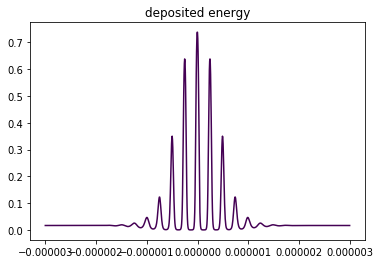

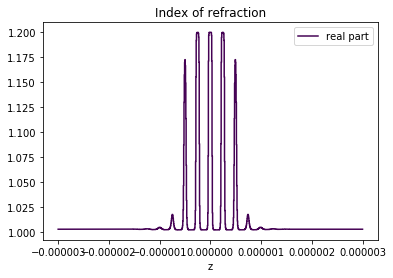

In [9]:
plt.plot(dielectric.z[:-1], dielectric.deposited_energy[:-1])
plt.title("deposited energy")
plt.show()

dielectric.plot(plot_imaginary=False)
plt.show()

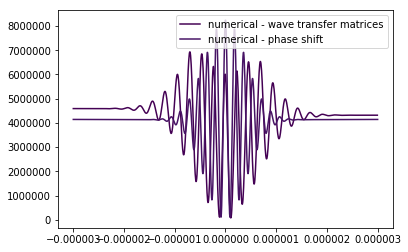

In [10]:
plt.plot(dielectric.z[:-1], dielectric.energy_distribution(intf)[:-1], label="numerical - wave transfer matrices")
plt.plot(fixed_dielectric.z, fixed_dielectric.energy_distribution(intf), label="numerical - phase shift")
# plt.plot(z, intf.intensity(z=z), label="analitical", alpha=0.1)
plt.legend()
plt.show()

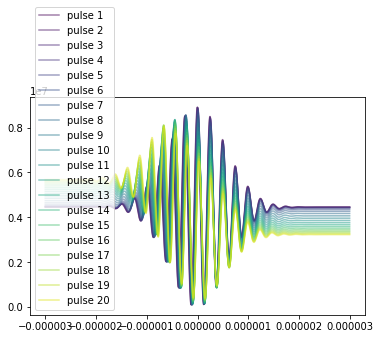

In [14]:
dielectric = w.Dielectric(z=z, n0=1, max_dn=0.2, max_visible_energy=4, min_energy=4e6, max_energy=1.5e7)
for pulse in range(20):
    phase = np.pi * pulse / 40
    intf = w.Interference(s, s * np.exp(1j*phase))
    plt.plot(dielectric.z[:-1], dielectric.energy_distribution(intf)[:-1], label="pulse {}".format(pulse + 1), alpha=0.5)
    dielectric.record(intf)
    
plt.legend(loc=3)
plt.show()

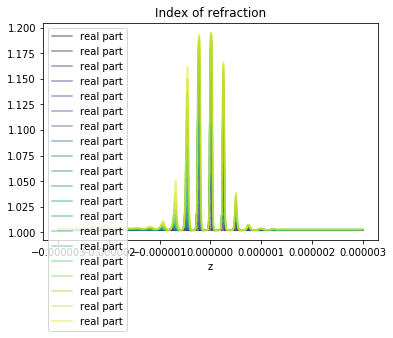

In [15]:
dielectric = w.Dielectric(z=z, n0=1, max_dn=0.2, max_visible_energy=5, min_energy=4e6, max_energy=1.5e7)
for pulse in range(20):
    phase = np.pi * pulse / 40
    intf = w.Interference(s, s * np.exp(1j*phase))
    dielectric.plot(plot_imaginary=False, alpha=0.5)
    dielectric.record(intf)
    
plt.legend()
plt.show()